## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함

In [3]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisdf = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
import warnings
warnings.filterwarnings('ignore')

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(irisdf)

KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
irisdf['target'] = iris.target
irisdf['cluster'] = kmeans.labels_
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

irisdf['pca_x'] = pca_transformed[:, 0]
irisdf['pca_y'] = pca_transformed[:, 1]

irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


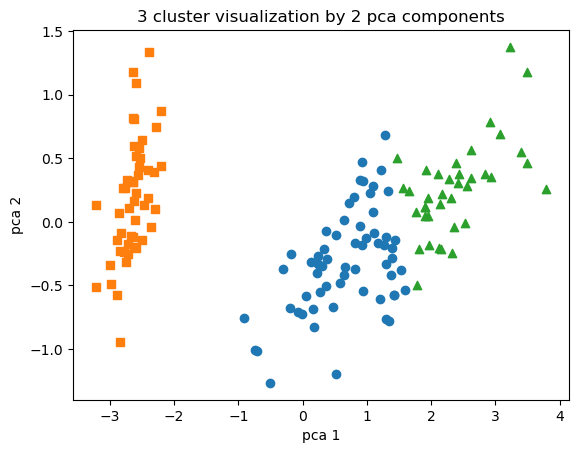

In [17]:
marker0_ind = irisdf[irisdf['cluster'] == 0].index
marker1_ind = irisdf[irisdf['cluster'] == 1].index
marker2_ind = irisdf[irisdf['cluster'] == 2].index

plt.scatter(x = irisdf.loc[marker0_ind, 'pca_x'], y = irisdf.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x = irisdf.loc[marker1_ind, 'pca_x'], y = irisdf.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x = irisdf.loc[marker2_ind, 'pca_x'], y = irisdf.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.title('3 cluster visualization by 2 pca components')

plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [22]:
clusterdf = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterdf['target'] = y
clusterdf.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


[0 1 2]


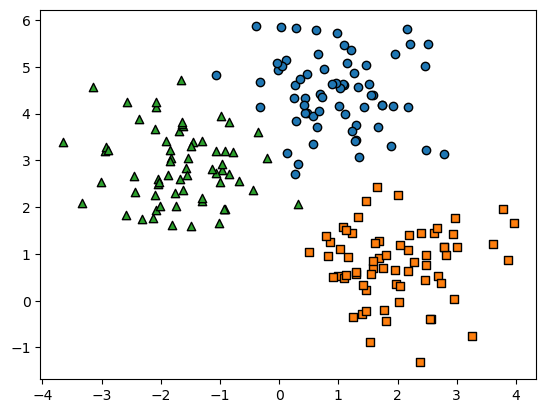

In [26]:
target_list = np.unique(y)
print(target_list)

markers = ['o', 's', '^']

for target in target_list :
    target_cluster = clusterdf[clusterdf['target'] == target]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'], edgecolor = 'k',
    marker = markers[target])
    
plt.show()

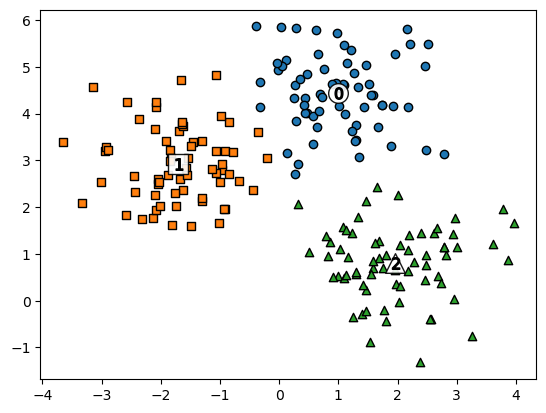

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)

clusterdf['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'X']

for label in unique_labels :
    label_cluster = clusterdf[clusterdf['kmeans_label'] == label]
    center_X_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', marker = markers[label])
    
    plt.scatter(x = center_X_y[0], y = center_X_y[1], s = 200, color = 'white',
               alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x = center_X_y[0], y = center_X_y[1], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
    
plt.show()

In [32]:
print(clusterdf.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [33]:
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8, random_state = 0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [34]:
clusterdf = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterdf['target'] = y
clusterdf.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
